In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
MODE = "COCO"

if MODE is "COCO":
    protoFile = "caffemodels/pose_deploy_linevec.prototxt"
    weightFile = "caffemodels/pose_iter_440000.caffemodel"
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]
#     BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
#                 "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
#                 "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
#                 "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

#     POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
#                 ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
#                 ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
#                 ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]

In [4]:
image = cv2.imread("Sample_Pic_OD/HJ.jpg")
frameHeight = image.shape[0]
frameWidth = image.shape[1]
threshold = 0.1

In [6]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightFile)

inWidth = 368
inHeight = 368

inpBlob = cv2.dnn.blobFromImage(image, 1.0/255, (inWidth, inHeight),
                               (0, 0 ,0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
H = output.shape[2]
W = output.shape[3]
print(output.shape)

(1, 57, 46, 46)


(-0.5, 2447.5, 3263.5, -0.5)

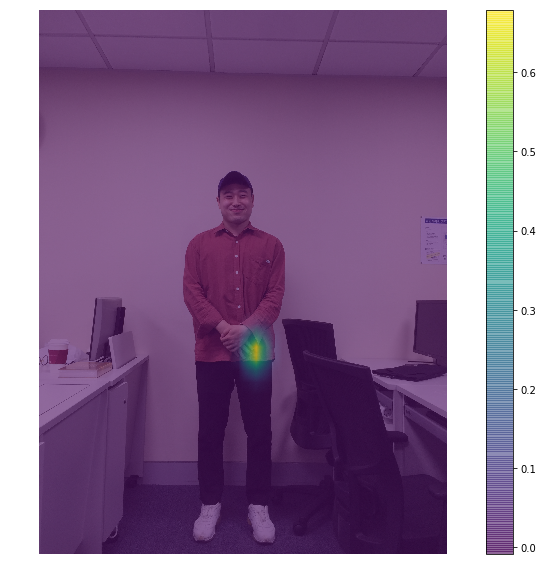

In [19]:
i = 11
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image.shape[1], image.shape[0]))
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis('off')

In [10]:
probMap

array([[0.00019204, 0.00019204, 0.00019204, ..., 0.00018283, 0.00018283,
        0.00018283],
       [0.00019204, 0.00019204, 0.00019204, ..., 0.00018283, 0.00018283,
        0.00018283],
       [0.00019204, 0.00019204, 0.00019204, ..., 0.00018283, 0.00018283,
        0.00018283],
       ...,
       [0.0001779 , 0.0001779 , 0.0001779 , ..., 0.00017863, 0.00017863,
        0.00017863],
       [0.0001779 , 0.0001779 , 0.0001779 , ..., 0.00017863, 0.00017863,
        0.00017863],
       [0.0001779 , 0.0001779 , 0.0001779 , ..., 0.00017863, 0.00017863,
        0.00017863]], dtype=float32)

(-0.5, 2447.5, 3263.5, -0.5)

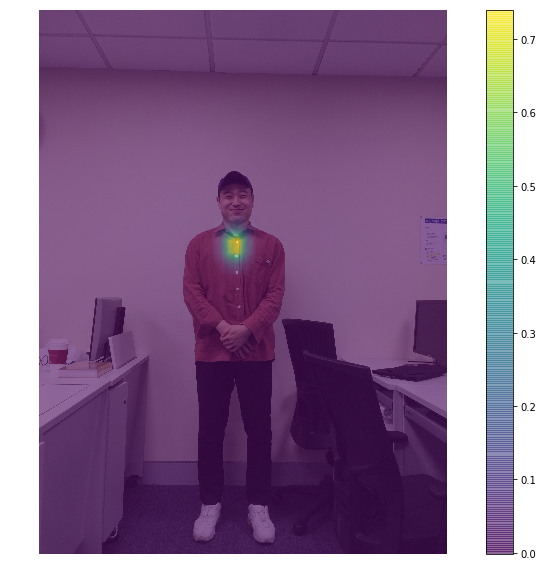

In [13]:
i = 1
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image.shape[1], image.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

In [55]:
frame = cv2.imread('Sample_Pic_OD/HJ.jpg')
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

inpBlob = cv2.dnn.blobFromImage(frame, 1.0/255, (inWidth, inHeight),
                               (0,0,0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
H = output.shape[2]
W = output.shape[3]

In [56]:
frameWidth, frameHeight, H, W

(2448, 3264, 46, 46)

(22, 16)
(22, 19)
(18, 19)
(17, 24)
(20, 26)
(26, 20)
(26, 24)
(23, 26)
(19, 28)
(19, 35)
(19, 41)
(24, 28)
(25, 35)
(24, 41)
(21, 15)
(22, 15)
(20, 16)
(24, 16)


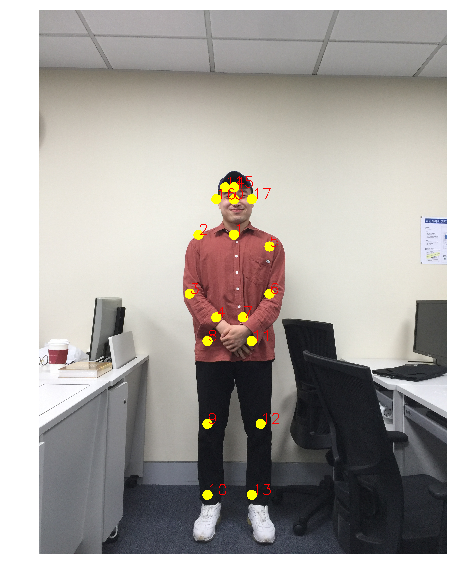

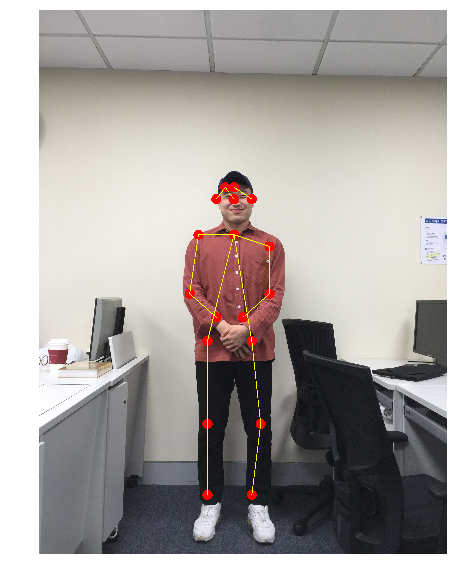

In [57]:
points = []

for i in range(nPoints):
    probMap = output[0, i, :, :]
#     probMap = cv2.resize(probMap, (frame.shape[1], frame.shape[0]))
    
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H
    print(point)
    if prob > threshold:
        cv2.circle(frameCopy, (int(x), int(y)), 30, (0,255,255), thickness=-1,
                  lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)),\
                cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255), 3)
        cv2.circle(frame, (int(x), int(y)), 30, (0,0,255), thickness=-1,
                  lineType=cv2.FILLED)
        
        # add the point to the list if the probability
        # is greater than the threshold
        points.append((int(x), int(y)))
    else:
        points.append(None)
        
# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]
    
    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0,255,255), 3)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
# 필요한 함수 : 시각적으로 보여주는 기능 + return : 각 부위의 좌표

# Function

In [107]:
frame = cv2.imread('Sample_Pic_OD/HJ.jpg')
protoFile = "caffemodels/pose_deploy_linevec.prototxt"
weightFile = "caffemodels/pose_iter_440000.caffemodel"
network = cv2.dnn.readNetFromCaffe(protoFile, weightFile)

def getSkeleton(frame, network):
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],\
                  [6,7],[1,8],[8,9],[9,10], [14,11], [11,12], [12,13] ]
    BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
            "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
            "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
            "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }
    idx_2_BODY_PARTS = {int(num):part for part, num in BODY_PARTS.items()}
    frameCopy = np.copy(frame)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    
    # inHeight / inWidth
    inWidth = 368
    inHeight = 368
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0/255, (inWidth, inHeight),\
                                   (0,0,0), swapRB=False, crop=False)
    
    dotsize = int((frameWidth + frameHeight) / (inWidth))
    textsize = int((frameWidth + frameHeight) / (inWidth * 4))
    
    network.setInput(inpBlob)
    
    output = network.forward()
    H = output.shape[2]
    W = output.shape[3]
    
    points = []
    
    for i in range(nPoints):
        # confidence map of corresponding body's part
        probMap = output[0, i, :, :]
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        
        x = (frameWidth * point[0]) / W
        y = (frameHeight * point[1]) / H
        
        if prob > threshold:
            cv2.circle(frameCopy, (int(x), int(y)), dotsize, (0,255,255),\
                      thickness=dotsize, lineType=cv2.FILLED)
            cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)),\
                       cv2.FONT_HERSHEY_SIMPLEX, textsize, (0,0,255), textsize, \
                       lineType=cv2.LINE_AA)
            cv2.circle(frame, (int(x), int(y)), dotsize, (0, 0, 255),\
                       thickness=dotsize, lineType=cv2.FILLED)
            # Add the point to the list if the probability is greater than the threshold
            points.append((int(x), int(y)))
        else:
            points.append(None)
    
    # Draw Skeleton
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]
        
        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0,255,255), 3)
    
    return frame, frameCopy, points   
    

In [108]:
img_skeleton, img_with_dot, points = getSkeleton(frame, network)

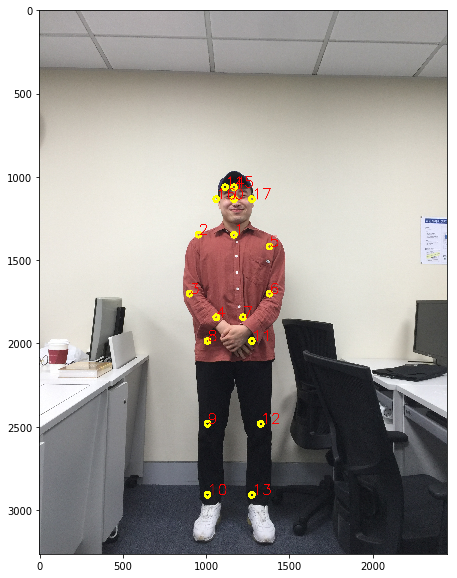

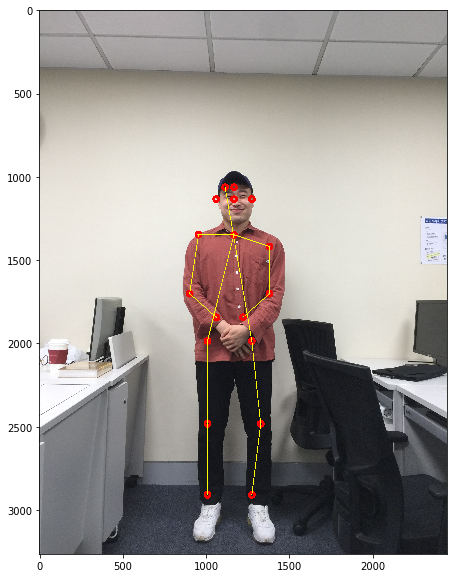

In [109]:
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img_with_dot, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img_skeleton, cv2.COLOR_BGR2RGB))

In [110]:
points

[(1170, 1135),
 (1170, 1348),
 (957, 1348),
 (904, 1702),
 (1064, 1844),
 (1383, 1419),
 (1383, 1702),
 (1224, 1844),
 (1011, 1986),
 (1011, 2483),
 (1011, 2909),
 (1277, 1986),
 (1330, 2483),
 (1277, 2909),
 (1117, 1064),
 (1170, 1064),
 (1064, 1135),
 (1277, 1135)]

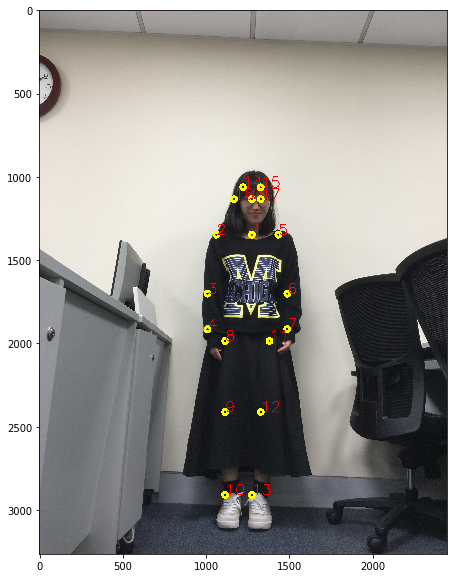

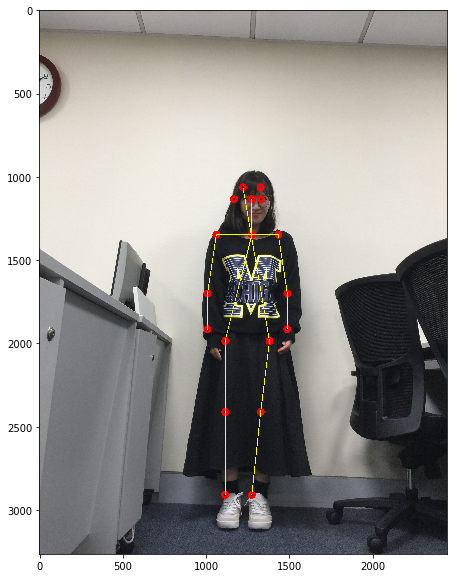

In [111]:
frame = cv2.imread('Sample_Pic_OD/YJ.jpg')
img_skeleton, img_with_dot, points = getSkeleton(frame, network)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img_with_dot, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img_skeleton, cv2.COLOR_BGR2RGB))